# Handwritten Digit Recognition using MNIST

This notebook provides an initial exploration of the MNIST dataset,
which is a benchmark dataset for handwritten digit recognition.

## Problem Statement

The goal of this project is to build a deep learning model capable of
recognizing handwritten digits (0–9) from grayscale images.
This task is a classical Optical Character Recognition (OCR) problem
and is widely used as an introduction to computer vision.

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Load Datasets
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(
    root="../data",
    train=True,
    download=False, # If you want to download training dataset yourself, you can change this to 'True'
    transform=transform
)

test_dataset = datasets.MNIST(
    root="../data",
    train=False,
    download=False, # If you want to download test dataset yourself, you can change this to 'True'
    transform=transform
)

## Dataset Description

- Training samples: 60,000
- Test samples: 10,000
- Image size: 28 × 28 pixels
- Color space: Grayscale
- Number of classes: 10 (digits 0–9)

If you don't have the datasets, you should change 'download=False' option in previous cell to 'True'

In [3]:
image, label = train_dataset[0]

print("Image shape:", image.shape)
print("Label:", label)

Image shape: torch.Size([1, 28, 28])
Label: 5


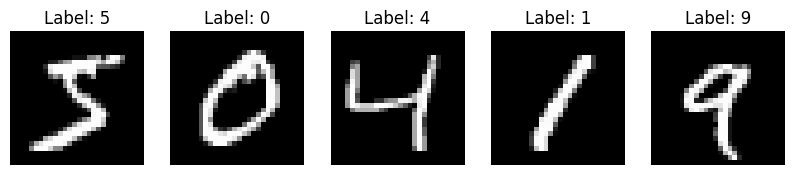

In [10]:
# Visualize some of the samples
fig, axes = plt.subplots(1, 5, figsize=(10, 3))

for i, ax in enumerate(axes):
    img, label = train_dataset[i]
    img = img.squeeze().numpy()
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis("off")

plt.savefig("../images/mnist_samples.png", bbox_inches="tight")
plt.show()

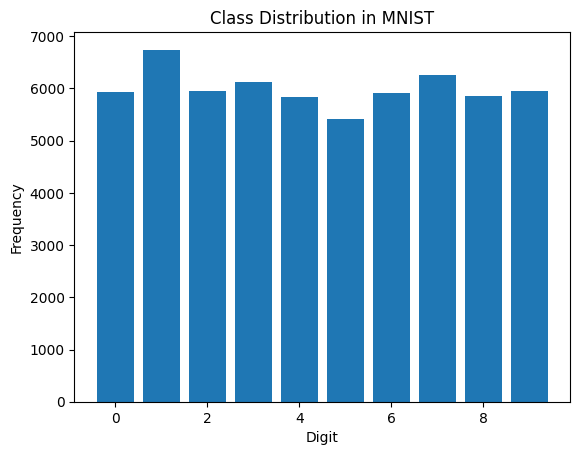

In [11]:
# Visualize class distribution for each number

labels = [label for _, label in train_dataset]
unique, counts = np.unique(labels, return_counts=True)

plt.bar(unique, counts)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Class Distribution in MNIST")
plt.savefig("../images/class_distribution.png", bbox_inches="tight")
plt.show()

## Observations

- The dataset is balanced across all digit classes.
- Images are low-resolution but sufficient for digit recognition.
- Variations in handwriting styles make the task non-trivial.